# Install libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# clone hifuku
parent_dir = '/content/drive/MyDrive' # install location
%cd $parent_dir
!git clone https://github.com/onnonuro/mmmetry.git

/content/drive/MyDrive
fatal: destination path 'mmmetry' already exists and is not an empty directory.


In [3]:
# install required dependencies.
root = f'{parent_dir}/mmmetry'
%cd $root
!pip install -e .

/content/drive/MyDrive/mmmetry
Obtaining file:///content/drive/MyDrive/mmmetry
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mmmetry
    Found existing installation: mmmetry 0.1.0
    Uninstalling mmmetry-0.1.0:
      Successfully uninstalled mmmetry-0.1.0
  Running setup.py develop for mmmetry


In [1]:
# Importing necessary libraries and modules for data handling, visualization, and mathematical operations.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
from glob import glob
import time

import csv
import os.path
from pathlib import Path
import random
import math
import warnings
warnings.simplefilter('ignore')

import cv2
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 933120000
from PIL import Image, ImageDraw, ImageFont
# from xml.etree.ElementTree import parse

import joblib
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy.spatial import distance
from scipy.stats import entropy
from sklearn.neighbors import KernelDensity

from tqdm import tqdm
from ultralytics import YOLO

import networkx as nx
from community import community_louvain
import mmmetry

# Set a sample image for analysis

In [4]:
root = '.'

wsi_path = f'{root}/data/sample_ALS_crop.jpeg'
scale = 0.2730  # Scale in µm/pixel for the WSI.

# Run Muscle Morphometry


0: 640x640 224 ms, 1: 640x640 201 ms, 2: 640x640 22 ms, 3: 640x640 230 ms, 4: 640x640 226 ms, 5: 640x640 20 ms, 6: 640x640 75 ms, 7: 640x640 80 ms, 8: 640x640 9 ms, 5242.9ms
Speed: 2.9ms preprocess, 582.5ms inference, 28.5ms postprocess per image at shape (1, 3, 640, 640)
100%|██████████| 470/470 [00:00<00:00, 1410.63it/s]
468it [00:01, 281.27it/s]

Area


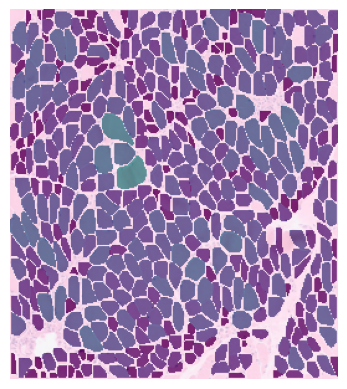

468it [00:00, 697.86it/s]


Circularity


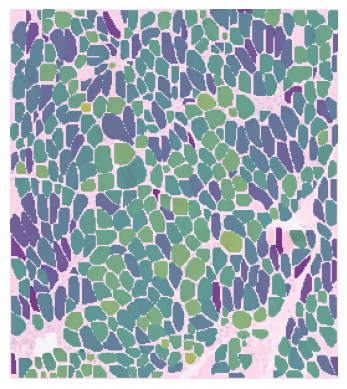

468it [00:00, 1678.33it/s]


Circularity in small fibers


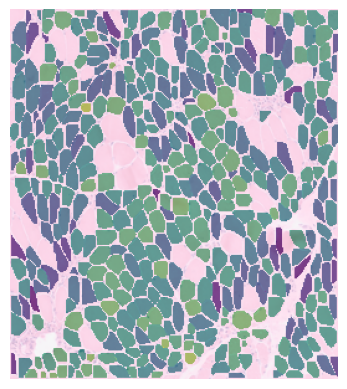

468it [00:00, 1651.99it/s]


Small angular fibers


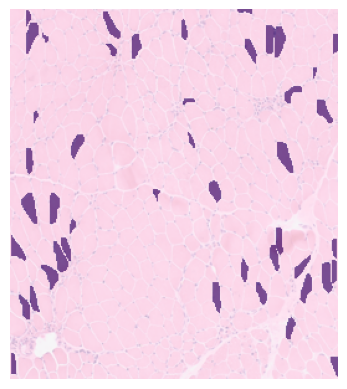

468it [00:00, 1639.89it/s]


Small round fibers


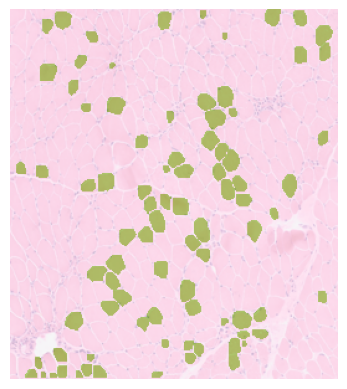

sample_ALS_crop
Prediction by LightGBM model
  Normal biopsy: 0.000±0.000%
  Myopathy: 29.586±36.105%
  Neuropathy: 70.414±36.105%
The analysis took 15 seconds.


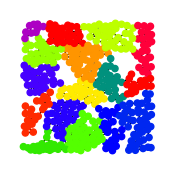

In [5]:
# Execute muscle morphometry
start_time = time.time()
result = mmmetry.main(root, wsi_path, scale=scale)
end_time = time.time()

# Calculate the total time taken
elapsed_time = int(end_time - start_time)
print(f"The analysis took {elapsed_time} seconds.")

(-0.5, 263.5, 297.5, -0.5)

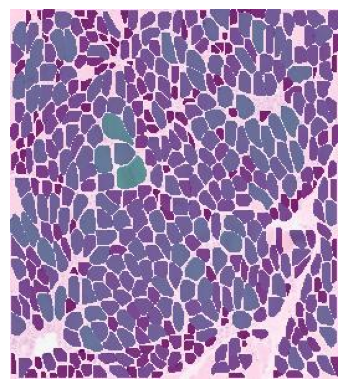

In [7]:
img = Image.open(f'/Users/M286333/Documents/_projects/mmmetry/results/sample_ALS_crop/sample_ALS_crop_area.jpg')
array = np.array(img)
plt.imshow(array)
plt.axis('off')

In [7]:
# Uncomment to unassign resources in Google Colab when finished.
# from google.colab import runtime
# runtime.unassign()